In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import gc

from scipy.stats import skew,kurtosis
import datetime

In [2]:
%matplotlib inline
# to view all columns
pd.set_option('display.max_columns',500)
plt.style.use('seaborn')

In [3]:
def summary_object(arg_df):
    
    object_list=[]
    category_list=[]
    bool_list=[]
    unilabel_list=[]
    missing_list=[]
    
    for c in arg_df.columns:
        if arg_df[c].dtypes==object:
            object_list.append(c)
        elif str(arg_df[c].dtypes)=='category':
            category_list.append(c)
        elif arg_df[c].dtypes==bool:
            bool_list.append(c)
    if len(object_list)+len(category_list)+len(bool_list)>0:    
        index_list=['Count','Unique','Missing (%)','Top','Top (%)','Bottom','Bottom (%)']
        df_summary=pd.DataFrame(data=np.zeros((len(index_list),len(object_list))),index=index_list,columns=object_list)

        for col in object_list+category_list+bool_list:
            vc=arg_df[col].value_counts().reset_index()
            df_summary.loc['Count',col]=(arg_df[col].count())
            df_summary.loc['Unique',col]=len(arg_df[col].unique())
            df_summary.loc['Missing (%)',col]=arg_df[col].isna().mean()*100
            df_summary.loc['Top',col]=vc.iloc[0,0]
            df_summary.loc['Top (%)',col]=vc.iloc[0,1]/len(arg_df)*100
            if len(arg_df[col].unique())>1:
                df_summary.loc['Bottom',col]=vc.iloc[-1,0]
                df_summary.loc['Bottom (%)',col]=vc.iloc[-1,1]/len(arg_df)*100
            else:
                unilabel_list.append(col)
            if df_summary.loc['Missing (%)',col]==100:
                missing_list.append(col)
                
        df_summary=df_summary.T.sort_values(['Missing (%)','Unique'],ascending=False)
        df_summary=df_summary[(df_summary['Unique']>1) & (df_summary['Missing (%)']!=100)]
        df_summary.reset_index(inplace=True)
        df_summary.index=df_summary.index+1
        df_summary.columns=['Attribute']+index_list
        
        print('SUMMARY OF {} NON-NUMERICAL ATTRIBUTES:\n'.format(
            len(object_list)+len(category_list)+len(bool_list)))
        if len(object_list)>0:
            print('{} Object Columns'.format(len(object_list)))
        if len(category_list)>0:
            print('{} Categorical Columns'.format(len(category_list)))
        if len(bool_list)>0:
            print('{} Bool Columns'.format(len(bool_list)))
        if len(unilabel_list)>0:
            print('\n{} Columns with Single Label : \n{}'.format(len(unilabel_list),unilabel_list))
        if len(missing_list)>0:
            print('\n{} Empty Columns: \n{}'.format(len(missing_list),missing_list))   
            
        del arg_df,object_list,vc,index_list,unilabel_list,missing_list
        gc.collect()
        return df_summary
    else:
        print('No Non-Numerical Attributes')
        
def summary_numerical(arg_df):

    target_list=[]
    missing_list=[]
    zero_skew_list=[]
    
    for c in arg_df.columns:
        datatype=arg_df[c].dtypes
        if datatype != object and datatype != bool and str(datatype) != 'category':
            target_list.append(c)
    if len(target_list)>0:
        from scipy.stats import skew,kurtosis
        
        index_list=['Count','Missing (%)','Mean','Median','Min','Max','Skewness','Kurtosis']
        df_summary=pd.DataFrame(data=np.zeros((len(index_list),len(target_list))),
                                index=index_list,columns=target_list)
        for col in target_list:
            df_summary.loc['Count',col]=arg_df[col].count()
            df_summary.loc['Missing (%)',col]=arg_df[col].isna().mean()*100
            if df_summary.loc['Missing (%)',col]!=100:
                df_summary.loc['Mean',col]=arg_df[col].mean()
                df_summary.loc['Median',col]=arg_df[col].median()
                df_summary.loc['Min',col]=arg_df[col].min()
                df_summary.loc['Max',col]=arg_df[col].max()
                df_summary.loc['Skewness',col]=skew(arg_df[col])
                if df_summary.loc['Skewness',col]==0:
                    zero_skew_list.append(col)
                df_summary.loc['Kurtosis',col]=kurtosis(arg_df[col])
            else:
                missing_list.append(col)
                
        df_summary=df_summary.T.sort_values(['Missing (%)','Skewness'],ascending=False)
        df_summary=df_summary[(df_summary['Skewness']!=0) & (df_summary['Missing (%)']!=100)]
        df_summary.reset_index(inplace=True)
        df_summary.index=df_summary.index+1
        df_summary.columns=['Attribute']+index_list
        
        print('SUMMARY OF {} NUMERICAL ATTRIBUTES:'.format(len(target_list)))
        if len(zero_skew_list)>0:
            print('\n{} Columns with Single Value: \n{}'.format(len(zero_skew_list),zero_skew_list))
        if len(missing_list)>0:
            print('\n{} Empty Columns: \n{}'.format(len(missing_list),missing_list))
        del arg_df,target_list,index_list
        gc.collect()

        return df_summary
    else:
        print('No Numerical Attributes')

In [4]:
def extract_room_row(arg_df,col_position):
    '''To return unique Room-Row from standard Room-Row-Column-Height position data'''
    roomrow=[]
    roomrow=arg_df[col_position].apply(lambda x :x.split('-')[0]+'-'+x.split('-')[1] if '-' in x else x)
    roomrow=roomrow.unique().tolist()
    roomrow=pd.DataFrame(roomrow,columns=['Unique_Row']).sort_values(by='Unique_Row')
    return roomrow['Unique_Row'].values

In [5]:
#filepath_1='C:/Users/Nan/Documents/GitHub_Data/merge.csv'
filepath_2='/home/nan/Desktop/GitHub_Data/merge_dispatch.csv'
#filename_1=filepath_1.rstrip('.csv')
filename_2=filepath_2.rstrip('.csv')
#merge=pd.read_csv(filepath_1)
merge_dispatch=pd.read_csv(filepath_2)

/home/nan/miniconda3/envs/tf36/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3044: DtypeWarning: Columns (5,10,16,33,54) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [6]:
target=merge_dispatch[merge_dispatch['Location Mission Request Destination_x']=='SPQI']

In [7]:
target.shape

(16511, 75)

In [8]:
target.columns

Index(['Transaction Date Time', 'Customer Label Code', 'Dry Matter Code',
       'Fruit', 'Fruit Per Pack', 'Fruit Size Code', 'Growing Method',
       'Japan Sub Brand Code', 'Labelling Indicator Code', 'Location Column_x',
       'Location Height_x', 'Location Room Code_x', 'Location Row Code_x',
       'Location Request Number_x', 'Location Mission Request Destination_x',
       'Marketer', 'Material Number', 'New Value', 'Ok Until Date',
       'Pack Code_x', 'Pack Date', 'Packed Fruit', 'Packhouse Code',
       'Pack Indicator Code', 'Pack Label Code', 'Pack Make', 'Packs',
       'Pack Type', 'Pallet Number', 'Pallet Rework Count', 'Plant Code',
       'Previous Value', 'Protocol Code', 'Purchase Pool Code_x',
       'Quality Inspection Indicator Code', 'Room', 'Storage Method Code',
       'Storing Characteristic Code', 'Transaction Date',
       'Transaction Sub Type Code', 'Trays', 'Trial Packing Indicator Code',
       'Username', 'Variety Code', 'Day_Shift', 'Shift_Hour', 'S

In [9]:
print('There are {} pallets went through SPQI.'.format(len(target['Pallet Number'].unique())))
print('Container order : {} '.format(len(target['Container Number'].unique())-1))
print('Envelope Number : {} '.format(len(target['Envelope Number'].unique())))
#print('Chartered order : {} '.format(len(target[target['Container Number']=='na'])))

There are 2617 pallets went through SPQI.
Container order : 229 
Envelope Number : 298 


In [10]:
target['Transaction Date']=pd.to_datetime(target['Transaction Date'],format='%d/%m/%Y %I:%M:%S %p')

/home/nan/miniconda3/envs/tf36/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


## Extract Process Completion Time

In [11]:
process=pd.DataFrame()
process['start_day']=target.groupby('Pallet Number')['Transaction Date Time'].first()
process['end_day']=target.groupby('Pallet Number')['Transaction Date Time'].last()

In [12]:
process['start_day']=pd.to_datetime(process['start_day'],format='%Y-%m-%d %H:%M:%S')
process['end_day']=pd.to_datetime(process['end_day'],format='%Y-%m-%d %H:%M:%S')

In [13]:
process['duration_hr']=process['end_day']-process['start_day']

In [14]:
process['duration_hr']=process['duration_hr'].astype('timedelta64[s]')

In [15]:
process['duration_hr']=process['duration_hr']/(60*60)

/home/nan/miniconda3/envs/tf36/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


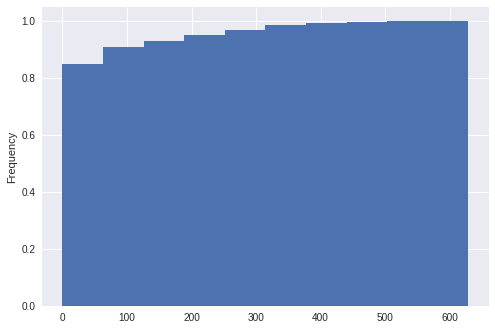

In [16]:
process['duration_hr'].plot(kind='hist',cumulative=True,normed=True)

In [17]:
process=process.drop(columns='end_day',axis='columns').reset_index()
process.head(3)

,Pallet Number,start_day,duration_hr
0,53188620,2019-07-27 09:55:21,0.001389
1,53188675,2019-07-04 20:33:04,180.518056
2,53189382,2019-07-01 23:46:32,8.263889


## Derive Day of Week

In [18]:
# add 1 because Monday is 0 and Sunday is 6 by default
process['day_of_week']=process['start_day'].dt.dayofweek+1

In [19]:
#process.head(3)

## Derive Shift

In [20]:
#process['dayshift']=(process['start_day'].dt.hour>=7) & (process['start_day'].dt.hour<19)

## Retrive First Move in target

In [21]:
process['First_move']=True

In [22]:
#target_right=process[['Pallet Number','start_day','First_move']]

In [23]:
df_first_move=target.merge(process,how='left',left_on=['Pallet Number','Transaction Date'],right_on=['Pallet Number','start_day'])

In [24]:
df_first_move['First_move'].fillna(False,inplace=True)

In [25]:
df_first_move=df_first_move[df_first_move['First_move']]

In [26]:
df_first_move.head(7)

,Transaction Date Time,Customer Label Code,Dry Matter Code,Fruit,Fruit Per Pack,Fruit Size Code,Growing Method,Japan Sub Brand Code,Labelling Indicator Code,Location Column_x,Location Height_x,Location Room Code_x,Location Row Code_x,Location Request Number_x,Location Mission Request Destination_x,Marketer,Material Number,New Value,Ok Until Date,Pack Code_x,Pack Date,Packed Fruit,Packhouse Code,Pack Indicator Code,Pack Label Code,Pack Make,Packs,Pack Type,Pallet Number,Pallet Rework Count,Plant Code,Previous Value,Protocol Code,Purchase Pool Code_x,Quality Inspection Indicator Code,Room,Storage Method Code,Storing Characteristic Code,Transaction Date,Transaction Sub Type Code,Trays,Trial Packing Indicator Code,Username,Variety Code,Day_Shift,Shift_Hour,Shift_Date,DOI_Number,Loadout Date,Location Room Code_y,Location Row Code_y,Location Column_y,Location Height_y,Loadout Priority,Purchase Pool Code_y,Pack Code_y,Pack Type Code,Stacking Configuration Code,Order Number,Order Line Number,Envelope Number,Container,Container Number,Shipment Type Code,Destination Port Code,Trucking Company Code,Location Request Number_y,Location Mission Request Destination_y,Pallet Note,Repack_Date_day,Last_Spqi_Date_day,Pack_Date_day,Ok_Until_Date_day,Load_Start_Date_hour,Tkl_Email_Date_day,start_day,duration_hr,day_of_week,First_move
0,2019-07-01 00:00:39,N,Y,7540,52,33,CK,N,GR,na,0,UNKNOWN,na,1324,SPQI,ZIL,61554,UNKNOWN,7/07/2019 12:00:00 AM,10193,25/05/2019 12:00:00 AM,7540,3TPP,N,N,KC1,145,ENP1KC1,59669482,0,1103,ALLO,N,1,A,UNKNOWN,CN,N,2019-07-01 00:00:39,MLA,228.484848,N,teaio,HW,False,0,2019-06-30 00:00:00,False,2019-07-17 11:00:00,UNKNOWN,na,na,na,6,1,10193,ENP1KC1,N,5334502,70,199054,8328.0,TTNU8962992,18,BEZEE,OMOK,na,na,False,0.0,-13.0,-54.0,4.0,-11.0,-2.0,2019-07-01 00:00:39,335.496667,1.0,True
11,2019-07-01 00:01:20,N,Y,11500,115,39,CK,N,LG,na,0,UNKNOWN,na,1324,SPQI,ZIL,62846,UNKNOWN,14/07/2019 12:00:00 AM,41716,28/05/2019 12:00:00 AM,11500,3TPP,N,N,KC1,100,ENMBKC1,59685451,0,1103,Q01-02-5-1,N,1,A,UNKNOWN,CN,N,2019-07-01 00:01:20,MTA,294.871795,N,yasms,HW,False,0,2019-06-30 00:00:00,False,2019-07-31 12:15:00,UNKNOWN,na,na,na,6,1,41716,ENMBKC1,N,5332701,30,199154,529.0,TRIU8970380,4,INMAA,RAYT,na,na,False,0.0,-27.0,-69.0,11.0,-60.0,-3.0,2019-07-01 00:01:20,266.217778,1.0,True
27,2019-07-01 00:02:20,N,Y,7656,33,33,CK,N,GR,na,1,CONTR,na,1324,SPQI,ZIL,61555,UNKNOWN,7/07/2019 12:00:00 AM,10192,22/05/2019 12:00:00 AM,7656,3TPP,N,N,KC1,232,ENITKC1,59431225,0,1103,ALLO,N,1,A,CONTR,CN,N,2019-07-01 00:02:20,MLA,232.000000,N,teaio,HW,False,0,2019-06-30 00:00:00,False,2019-07-29 13:30:00,CONTR,na,na,na,6,1,10192,E3ITKC1,3,5340902,40,199236,8542.0,TEMU9001169,18,CNSHG,K&ST,na,na,False,0.0,-11.0,-69.0,6.0,-13.0,-5.0,2019-07-01 00:02:20,443.263056,1.0,True
47,2019-07-06 02:11:08,N,Y,7540,52,33,CK,N,GR,na,1,CONTR,na,1388,SPQI,ZIL,61554,Q01-24-8-2,14/07/2019 12:00:00 AM,10193,1/06/2019 12:00:00 AM,7540,3TPP,N,N,KC1,145,ENP1KC1,59698529,0,1103,Q01-04-12-1,N,1,A,CONTR,CN,N,2019-07-06 02:11:08,MTA,228.484848,N,geovu,HW,False,2,2019-07-05 00:00:00,False,2019-07-25 17:15:00,CONTR,na,na,na,6,1,10193,ENP1KC1,N,5337701,40,199175,8490.0,SEGU9406495,18,BEZEE,WAIO,na,na,False,0.0,-14.0,-55.0,2.0,-41.0,-3.0,2019-07-06 02:11:08,253.135556,6.0,True
55,2019-07-26 22:31:38,N,Y,13000,130,42,CK,N,LG,na,1,LO1,na,1825,SPQI,ZIL,62853,Q02-03-9-1,14/07/2019 12:00:00 AM,41236,1/06/2019 12:00:00 AM,13000,3TPP,N,N,KC1,100,ENMBKC1,59700178,0,1103,Q02-03-9-2,N,1,A,LO1,CN,N,2019-07-26 22:31:38,MLA,309.523810,N,geovu,HW,False,22,2019-07-26 00:00:00,False,2019-08-02 06:15:00,LO1,na,na,na,6,1,41236,HNMBKC1,N,5318004,20,199232,507.0,SUDU6047869,4,CATOR,K&ST,1994.0,CONTR,False,-3.0,-3.0,-71.0,9.0,-6.0,-3.0,2019-07-26 22:31:38,9.975556,5.0,True
66,2019-07-12 12:12:36,N,Y,8448,33,33,CK,N,GR,na,0,UNKNOWN,na,1476,SPQI,ZIL,61556,UNKNOWN,14/07/2019 12:00:00 AM,10192,28/05/2019 12:00:00 AM,7656,3TPP,N,N,KC1,256,E3ITKC1,59708952,0,1103,Q05-14-2-1,N,1,A,UNKNOWN,CN,N,2019-07-12 12:12:36,MTA,256.0

In [60]:
df_first_move['Labelling Indicator Code'].value_counts()

GR    1822
LG     438
JB     276
UN      44
NK      19
DB      15
LD       3
Name: Labelling Indicator Code, dtype: int64

In [ ]:
drop_list=['Loadout Date','Location Room Code_y','Location Row Code_y','Location Column_y','Location Height_y']

## Derive Packtype Change

In [53]:
# testing
#temp=df_first_move[df_first_move['Pack Type']!=df_first_move['Pack Type Code']][['Pack Type','Pack Type Code']]
#temp['FW_Stacking']=temp['Pack Type'].apply(lambda x:x[1])!=temp['Pack Type Code'].apply(lambda x:x[1])

In [54]:
df_first_move['FW_Stacking']=df_first_move['Pack Type'].apply(lambda x:x[1])!=df_first_move['Pack Type Code'].apply(lambda x:x[1])

In [59]:
df_first_move.sample(3)

,Transaction Date Time,Customer Label Code,Dry Matter Code,Fruit,Fruit Per Pack,Fruit Size Code,Growing Method,Japan Sub Brand Code,Labelling Indicator Code,Location Column_x,Location Height_x,Location Room Code_x,Location Row Code_x,Location Request Number_x,Location Mission Request Destination_x,Marketer,Material Number,New Value,Ok Until Date,Pack Code_x,Pack Date,Packed Fruit,Packhouse Code,Pack Indicator Code,Pack Label Code,Pack Make,Packs,Pack Type,Pallet Number,Pallet Rework Count,Plant Code,Previous Value,Protocol Code,Purchase Pool Code_x,Quality Inspection Indicator Code,Room,Storage Method Code,Storing Characteristic Code,Transaction Date,Transaction Sub Type Code,Trays,Trial Packing Indicator Code,Username,Variety Code,Day_Shift,Shift_Hour,Shift_Date,DOI_Number,Loadout Date,Location Room Code_y,Location Row Code_y,Location Column_y,Location Height_y,Loadout Priority,Purchase Pool Code_y,Pack Code_y,Pack Type Code,Stacking Configuration Code,Order Number,Order Line Number,Envelope Number,Container,Container Number,Shipment Type Code,Destination Port Code,Trucking Company Code,Location Request Number_y,Location Mission Request Destination_y,Pallet Note,Repack_Date_day,Last_Spqi_Date_day,Pack_Date_day,Ok_Until_Date_day,Load_Start_Date_hour,Tkl_Email_Date_day,start_day,duration_hr,day_of_week,First_move,FW_Stacking,FW_ChngBase
802,2019-07-23 23:21:59,N,Y,7200,72,25,CK,N,GR,na,0,UNKNOWN,na,1716,SPQI,ZIL,61589,Q28-15-7-1,7/07/2019 12:00:00 AM,10176,23/05/2019 12:00:00 AM,7200,2FXP,N,N,KJ1,100,ENMBKJ1,59331020,0,1103,Q28-15-6-1,N,1,A,UNKNOWN,CN,N,2019-07-23 23:21:59,MLA,288.0,N,jaspsi,HW,False,23,2019-07-23 00:00:00,False,2019-07-29 10:15:00,UNKNOWN,na,na,na,4,1,10176,ENMBKJ1,N,5169502,30,199293,na,na,1,ESTAR,OMOK,na,na,False,0.0,-5.0,-68.0,6.0,38.0,0.0,2019-07-23 23:21:59,15.242500,2.0,True,False,False
15198,2019-07-18 16:35:19,N,Y,6264,27,27,CK,N,GR,na,0.0,UNKNOWN,na,1554,SPQI,ZIL,61342,UNKNOWN,16/06/2019 12:00:00 AM,10309,4/05/2019 12:00:00 AM,6264,3TPP,N,N,KC6,232,ENITKC6,57428654,0,1103,ZT03-40-7-1,N,16,A,UNKNOWN,CN,N,2019-07-18 16:35:19,MLA,232.0,N,shama,GA,True,16,2019-07-18 00:00:00,False,2019-07-22 09:30:00,UNKNOWN,na,na,na,5,16,10309,E3ITKC6,3,5337606,30,199133,8511.0,SUDU9012228,18,CNSHG,TOLL,na,na,False,0.0,-4.0,-89.0,13.0,-81.0,-3.0,2019-07-18 16:35:19,15.085278,4.0,True,True,False
2036,2019-07-01 11:30:21,N,Y,7680,48,30,CK,N,GR,na,0,UNKNOWN,na,1302,SPQI,ZIL,61581,UNKNOWN,9/06/2019 12:00:00 AM,10180,24/05/2019 12:00:00 AM,7680,3TPP,N,N,KC6,160,ENMLKC6,59443945,0,1103,Q29-24-3-2,N,16,A,UNKNOWN,BS,N,2019-07-01 11:30:21,MLA,256.0,N,tomin,GA,True,11,2019-07-01 00:00:00,False,2019-07-08 06:15:00,UNKNOWN,na,na,na,1,16,10180,ENMLKC6,N,5148501,60,197481,na,na,1,KRPTK,NZLT,na,na,False,-6.0,-7.0,-46.0,13.0,18.0,0.0,2019-07-01 11:30:21,1.460556,1.0,True,False,False


In [57]:
df_first_move['FW_ChngBase']=df_first_move['Pack Type'].apply(lambda x:x[0])!=df_first_move['Pack Type Code'].apply(lambda x:x[0])

In [58]:
df_first_move[['Pack Type','Pack Type Code','FW_Stacking','FW_ChngBase']]

,Pack Type,Pack Type Code,FW_Stacking,FW_ChngBase
0,ENP1KC1,ENP1KC1,False,False
11,ENMBKC1,ENMBKC1,False,False
27,ENITKC1,E3ITKC1,True,False
47,ENP1KC1,ENP1KC1,False,False
55,ENMBKC1,HNMBKC1,False,True
66,E3ITKC1,E3ITKC1,False,False
68,ENBMKCT,E1BMKC1,True,False
81,E2MLKC6,E2MLKC6,False,False
86,ENITKC3,E3ITKC1,True,False
88,ENMBKC1,E1MBKC1,True,False
